In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Fungsi Dijkstra
def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous_nodes

In [ ]:
# Fungsi untuk mendapatkan path
def get_path(previous, end):
    path = []
    while end is not None:
        path.insert(0, end)
        end = previous[end]
    return path

In [ ]:
# Fungsi visualisasi
def visualize_graph(graph, path=None, layout='circular'):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    if layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=3)

    plt.title('Visualisasi Graf dengan Jalur Terpendek')
    plt.show()

Jarak dari A ke Z: 14
Jalur: A -> B -> D -> E -> Z


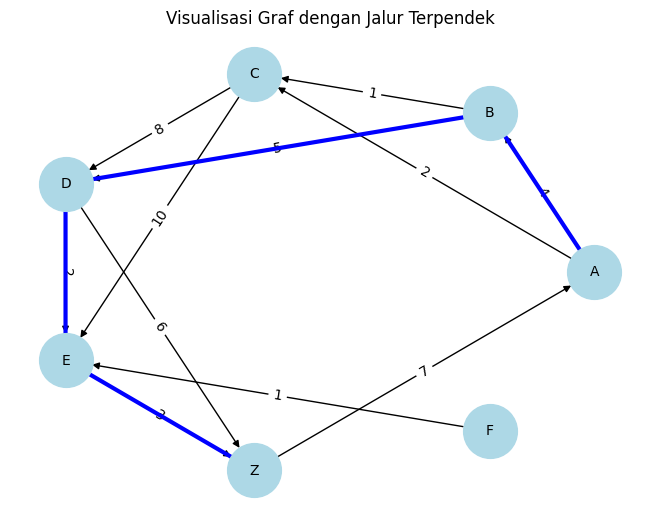

In [ ]:
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {'A': 7},
    'F': {'E': 1},
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)

# Output hasil
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

# Visualisasi dengan layout circular
visualize_graph(graph, path=shortest_path, layout='circular')

Jarak dari A ke Z: 14
Jalur: A -> B -> D -> E -> Z


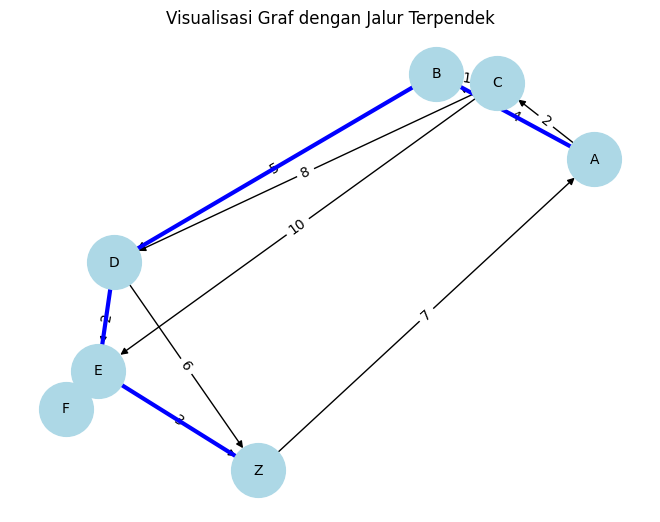

In [ ]:
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {'A': 7},
    'F': {'E': 1},
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)

# Output hasil
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

# Visualisasi dengan layout kamada
visualize_graph(graph, path=shortest_path, layout='kamada')